# 🔹 **Kelompok 14**

# 👥 Daftar Anggota:
1. **Agung Febrian** (220660121086)  
2. **Kemal Hapidz Prastiawan** (220660121115)  
3. **Dede Yayan Suciyana** (220660121179)

# Persiapan Dataset

## Download Dataset
Menggunakan dataset dari Kaggle:

https://www.kaggle.com/datasets/prachi13/customer-analytics

# Langkah 1 Upload Dataset

In [ ]:
# 1.1 Upload file CSV dari lokal
from google.colab import files
uploaded = files.upload()

# 1.2 Load dataset
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Train.csv']))
df.head()

Saving Train.csv to Train.csv


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Langkah 2 Data Cleaning & Preprocessing

In [ ]:
# 2.1 Hapus duplikat dan cek nilai kosong
df = df.drop_duplicates()
print("Missing Values per Kolom:\n", df.isnull().sum())

# 2.2 Label Encoding kolom kategorikal
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']:
    df[col] = le.fit_transform(df[col])

# 2.3 Pisahkan fitur dan target
X = df.drop(['ID', 'Reached.on.Time_Y.N'], axis=1)
y = df['Reached.on.Time_Y.N']

# 2.4 Scaling fitur numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Missing Values per Kolom:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


# Langkah 3 Exploratory Data Analysis (EDA)

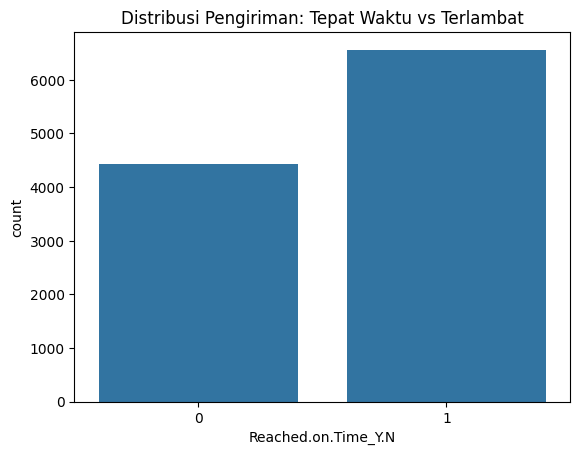

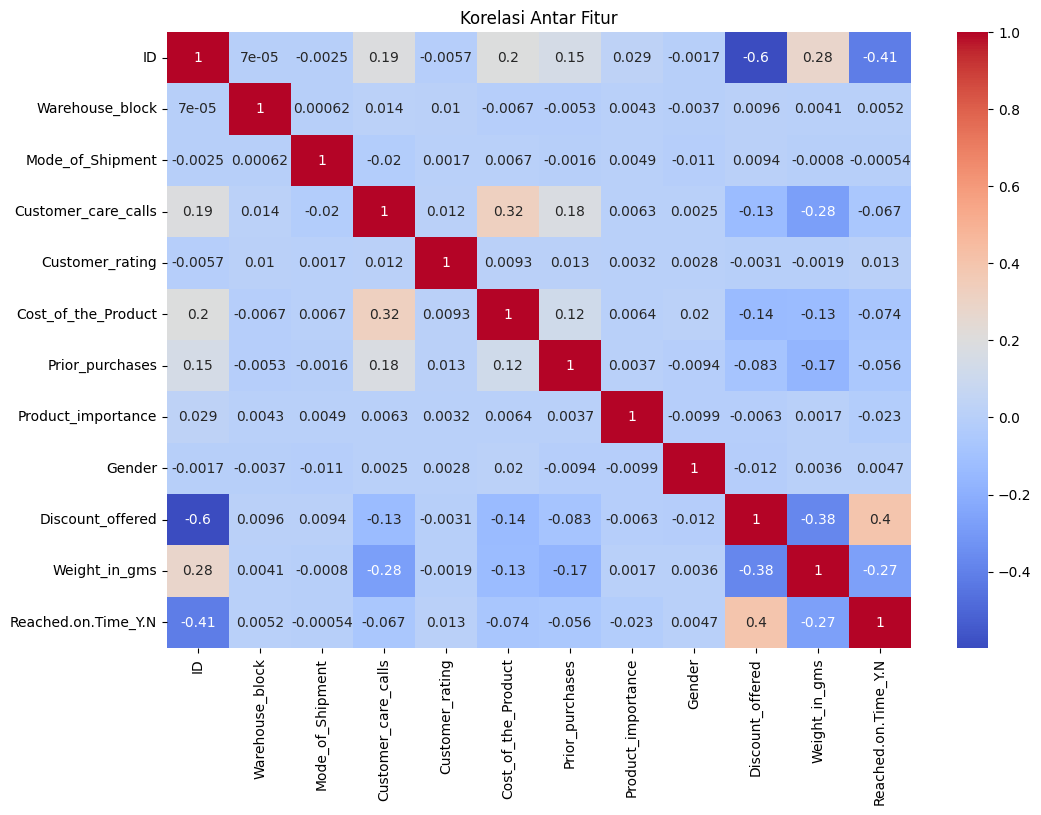

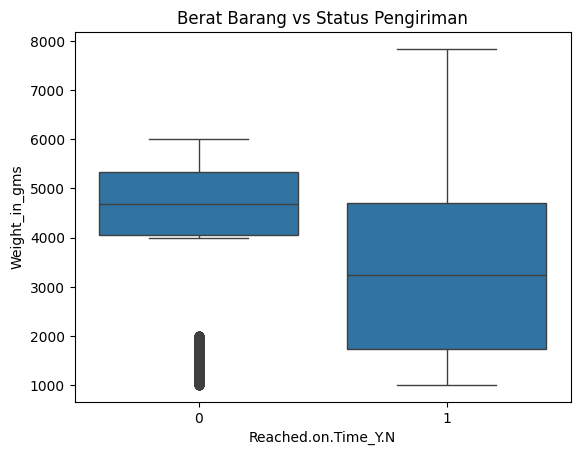

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3.1 Visualisasi distribusi target
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title("Distribusi Pengiriman: Tepat Waktu vs Terlambat")
plt.show()

# 3.2 Heatmap korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

# 3.3 Berat barang vs keterlambatan (boxplot)
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data=df)
plt.title("Berat Barang vs Status Pengiriman")
plt.show()

# Langkah 4 Clustering (Segmentasi Pelanggan/Transaksi)

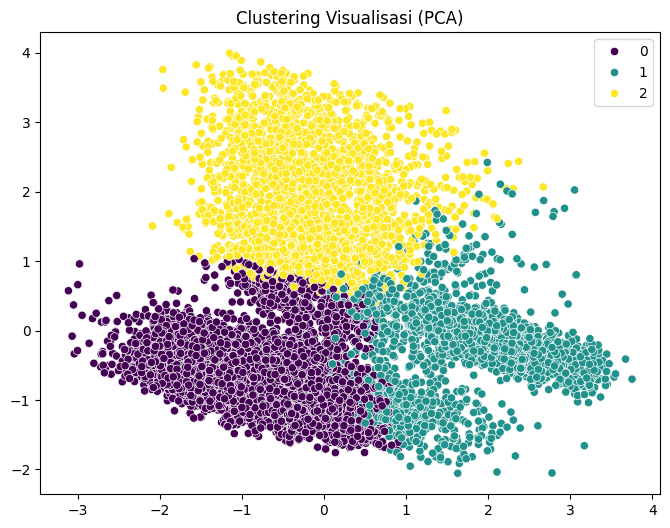

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 4.1 Reduksi dimensi untuk visualisasi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4.2 Clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# 4.3 Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title("Clustering Visualisasi (PCA)")
plt.show()

# Langkah 5 Model Prediksi (Supervised Learning)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 5.1 Split Data untuk Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5.2 Latih Model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Langkah 6 Evaluasi Model

              precision    recall  f1-score   support

           0       0.57      0.70      0.63       895
           1       0.76      0.64      0.69      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.67      2200



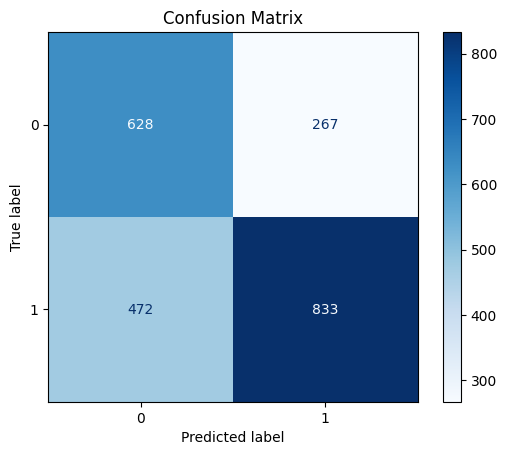

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 6.1 Classification Report
print(classification_report(y_test, y_pred))

# 6.2 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Langkah 7 Visualisasi & Insight Bisnis

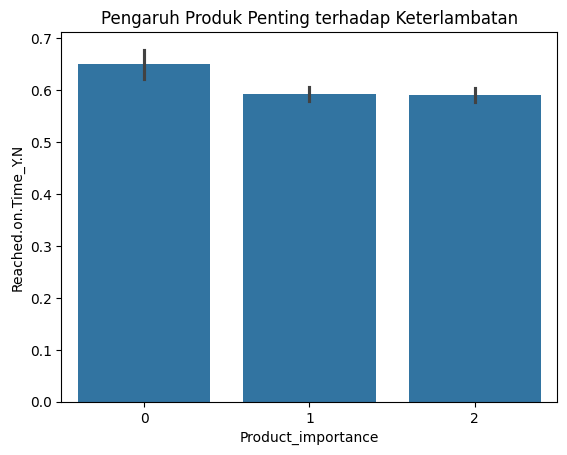

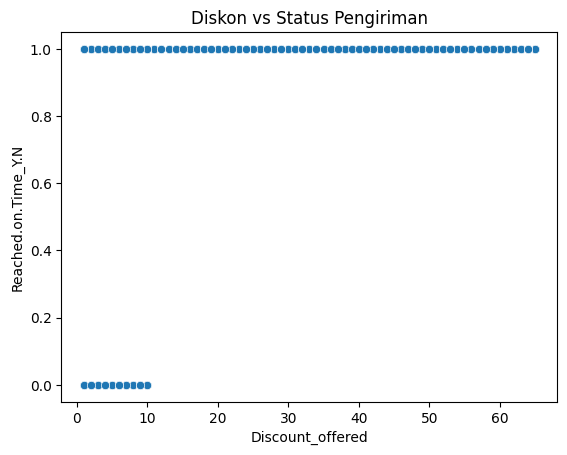

In [ ]:
# 7.1 Barplot: Produk penting vs keterlambatan
sns.barplot(x='Product_importance', y='Reached.on.Time_Y.N', data=df)
plt.title("Pengaruh Produk Penting terhadap Keterlambatan")
plt.show()

# 7.2 Scatterplot: Diskon vs keterlambatan
sns.scatterplot(x='Discount_offered', y='Reached.on.Time_Y.N', data=df)
plt.title("Diskon vs Status Pengiriman")
plt.show()